Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-247.837,-257.468,5.3208e-77
2,140.151,4.0,-244.976,-254.593,9.43367e-76
3,140.302,4.0,-242.143,-251.746,1.62563e-74
4,140.452,4.0,-239.339,-248.928,2.72271e-73
5,140.603,4.0,-236.563,-246.138,4.43218e-72
6,140.754,4.0,-233.816,-243.377,7.01248e-71
7,140.905,4.0,-231.097,-240.644,1.07836e-69
8,141.055,4.0,-228.406,-237.939,1.61174e-68
9,141.206,4.0,-225.744,-235.263,2.34132e-67


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,155.075,10.995,-73.7734,-82.257,0.659512
2,157.789,10.191,-74.0897,-82.427,0.556404
3,155.98,7.69849,-74.4695,-82.9023,0.345945
4,154.322,9.70854,-73.4781,-82.0057,0.847981
5,155.226,10.191,-73.4728,-81.9478,0.898501
6,153.266,9.54774,-73.8104,-82.4018,0.570646
7,155.226,13.7286,-75.5426,-84.0176,0.113402
8,156.131,10.3518,-73.5899,-82.0144,0.840598
9,155.075,11.397,-73.9756,-82.4592,0.53878


### Snippet 4.23

Density of sigma

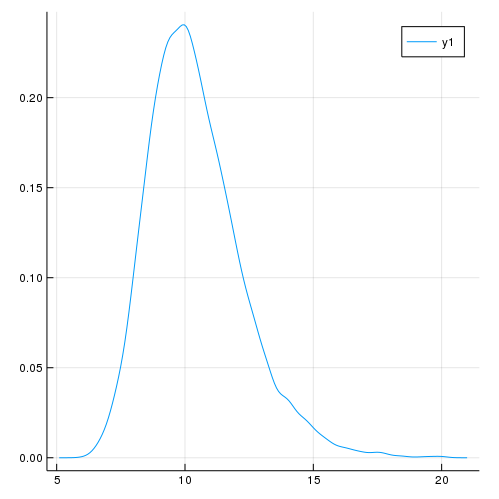

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*